In [1]:
%ls

Distribucions.ipynb        car.py
M_q.py                     car.py~
Millora.ipynb              parquing.py
Post Processament.ipynb    parquing.py~
Primer LLiurament.docx     sim_ge1.py
Rubrica.pdf                sim_ge1.pyc
Simular_exercici.py        simular.py
Simular_exercici.py.html   simular_ge.py
Simular_exercici.py_files/ simular_ge.pyc
Simular_exercici.pyc


In [2]:
%run sim_ge1

# Obtinc el rang dels bons:


In [3]:
def tractar_esdeveniments(na_notractada,Temps_execucio):
    
    na_ordenada= ordenar_esdeveniments(na_notractada)
    # el q n s'arriba a produir
    i = na_ordenada[:,0]< Temps_execucio*3600
    na_tractada= na_ordenada[i,:]
    
    return na_tractada

def ordenar_esdeveniments(na_notractada):
    #index llista esdeveniments ordenada per temps
    i = np.argsort(na_notractada[:,0])
    #esdeveniments ordenats per temps
    na_notractada = np.copy(na_notractada[i,:])
    return na_notractada

In [4]:
#temps simulació en hores
t_simulacio = 3
na_notractada = Simular_Ex(t_simulacio)

In [5]:
na_tractada = tractar_esdeveniments(na_notractada,t_simulacio)
np.cumsum(na_tractada[:,1])

array([  0.,   1.,   2., ...,  77.,  78.,  77.])

In [6]:
t_simulacio

3

In [156]:
t = na_tractada[:,0]
cum_sum = np.cumsum(na_tractada[:,1])
print'El nombre de places ocupades al transcorrer "Temps simulació" és:',int(cum_sum[-1])

El nombre de places ocupades al transcorrer "Temps simulació" és: 77


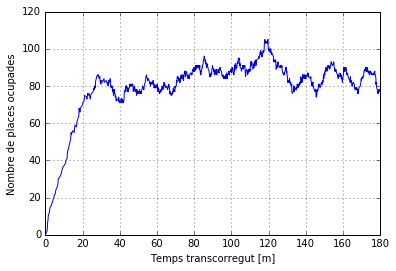

In [8]:
%matplotlib inline
plt.plot(t/60,cum_sum)
plt.xlabel('Temps transcorregut [m]')
plt.ylabel('Nombre de places ocupades')
plt.grid()

In [68]:
%run simular

In [69]:
t_simulacio = 3
n_places = generar_simulacio(t_simulacio)
print 'El nombre de places és:',n_places

El nombre de places és: 78.0


# Simulacions

Genero 100 Simulacions de durada 3 hores

In [219]:
def generar_simulacions(t_simulacio,N_simulacions):
    ll_places = [generar_simulacio(t_simulacio) for i in np.arange(0,100)]
    return ll_places

In [125]:
%%time
t_simulacio = 3
N_simulacions = 100
ll = generar_simulacions(t_simulacio,N_simulacions)

CPU times: user 16.3 s, sys: 67.7 ms, total: 16.4 s
Wall time: 16.4 s


In [126]:
print 'Temps simulació: {} hores'.format(t_simulacio)
print 'Num simulacions:',N_simulacions

Temps simulació: 3 hores
Num simulacions: 100


Calculo éstadístiques deles simulacions.

Els valors d' **ll** i **x** són nombre de places ocupades al final de les simulacions dutes a terme.

In [127]:
from scipy.stats import norm, histogram
import scipy.stats.stats as st
x = np.array([ll])
loc ,scale = norm.fit(x)
min = x.min()
max = x.max()
print('mean:',loc)
print('std:',scale)
print('min',x.min())
print('max',x.max())
print'loc',loc
print'scale',scale

('mean:', 84.200000000000003)
('std:', 9.2390475699608778)
('min', 61.0)
('max', 107.0)
loc 84.2
scale 9.23904756996


A partir d'aquí comencen a ser importants:

* min:
* max:
* loc:
* scale:

## Histograma nombre de places

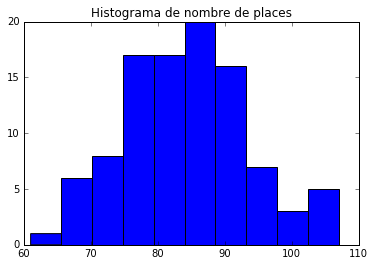

In [128]:
plt.hist(ll)
plt.title('Histograma de nombre de places')

## Histograma normalitzat i pdf

Em curo amb salut

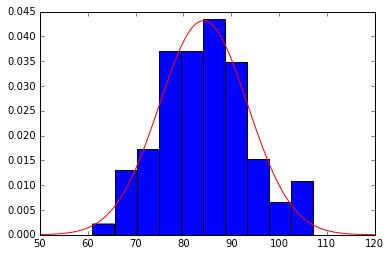

In [132]:
plt.hist(ll,normed=True)
x = np.linspace(50,120,100)
p = plt.plot(x,norm.pdf(x,loc=loc,scale=scale),'r-',label='PDF de normal')

## Quin percentatge de la població es troba dins del rang de les nostres simulacions?

In [ ]:
from scipy.integrate import trapz
#agafo el valor minim i el valor màxim de la distribució que estic tractant
x1 = np.linspace(61,107,100)
#integro de 
p = trapz(norm.pdf(x1,loc=loc,scale=scale), x1)
print "{:.2%} of values lie between 60 and 111".format(p)
fb = plt.fill_between(x1, norm.pdf(x1,loc=loc,scale=scale),color="gray")
p= plt.plot(x, norm.pdf(x,loc=loc,scale=scale),'r-')
plt.title({:.2%} of values lie between 60 and 111".format(p))


## Test de normalitat:

Faig test de normalitat:

In [136]:
t,p = scipy.stats.normaltest(ll)
# diferencia entre el ratio de l'error estandard i el de la població
print "x? = {}".format(t)
# he augmentat el centre de la dos doncs ara resulta molt poc probable de que estiguem tractant d'una mateixa població
print "p-value = {}".format(p)

x? = 0.939071104285
p-value = 0.625292616668


## Prob acumulada... per on van els tiros?

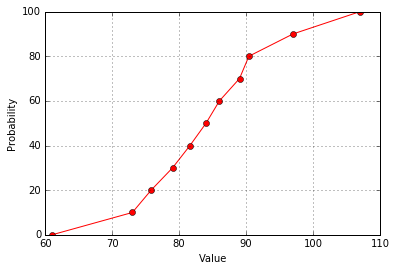

In [137]:
plot_percentiles = range(0, 110, 10) 
x = np.percentile(ll, plot_percentiles)
plt.plot(x, plot_percentiles, 'ro-')
plt.xlabel('Value')
plt.ylabel('Probability')  
plt.grid()
plt.show()

In [1]:
from scipy import stats
import matplotlib.pyplot as plt

nsample=len(ll)

plot_percentiles = range(0, 110, 10) 
x = np.percentile(ll, plot_percentiles)
#create list of random variables


# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(x, dist='norm')

#plot results
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#define ticks
ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]

#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]

#assign new ticks
plt.yticks(ticks_quan,ticks_perc)

#show plot
plt.grid()
plt.show()

NameError: name 'll' is not defined

Genero 10.000 simulacions de durada 3 hores.

In [155]:
%%time
t_simulacio = 3
N_simulacions = 10000
ll = generar_simulacions(t_simulacio,N_simulacions)

CPU times: user 32min 49s, sys: 16.3 s, total: 33min 6s
Wall time: 33min 31s


In [140]:
print 'Temps simulació: {} hores'.format(t_simulacio)
print 'Num simulacions:',N_simulacions

Temps simulació: 3 hores
Num simulacions: 1000


x ara serà la meva llista.

Està b que posi com mínim i màxim de la norma els mínims i màxims de la nostra distribució?
despres independentment faré un test no en tinc clara la lectura... tests d'hipotesis

In [141]:
from scipy.stats import norm, histogram
import scipy.stats.stats as st
x = np.array([ll])
loc ,scale = norm.fit(x)
min = x.min()
max = x.max()
print('mean:',loc)
print('std:',scale)
print('min',x.min())
print('max',x.max())
print'loc',loc
print'scale',scale

('mean:', 84.079999999999998)
('std:', 9.1840949472443931)
('min', 54.0)
('max', 116.0)
loc 84.08
scale 9.18409494724


## Histograma nombre de places

(array([   2.,   21.,   83.,  182.,  237.,  266.,  126.,   71.,    9.,    3.]),
 array([  54. ,   60.2,   66.4,   72.6,   78.8,   85. ,   91.2,   97.4,
         103.6,  109.8,  116. ]),
 <a list of 10 Patch objects>)

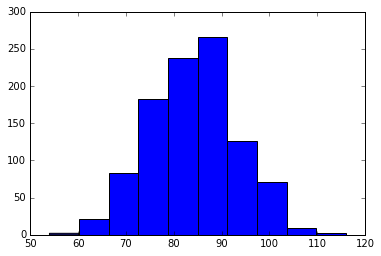

In [142]:
plt.hist(ll)

## Histograma normalitzat i pdf

Em curo n salut

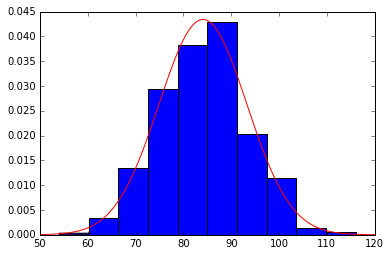

In [147]:
h =plt.hist(ll,normed=True)
x = np.linspace(50,120,100)
p = plt.plot(x,norm.pdf(x,loc=loc,scale=scale),'r-',label='PDF de normal')

## Quin percentatge de la població es troba dins del rang de les nostres simulacions?

99.92% of values lie between 54 and 116


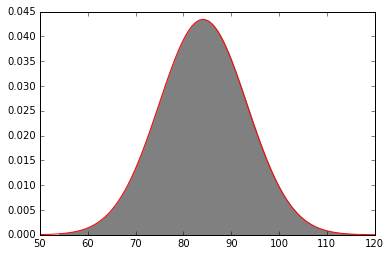

In [148]:
from scipy.integrate import trapz
#agafo el valor minim i el valor màxim de x
x1 = np.linspace(54,116,100)
#integro de 
p = trapz(norm.pdf(x1,loc=loc,scale=scale), x1)
print "{:.2%} of values lie between 54 and 116".format(p)
fb = plt.fill_between(x1, norm.pdf(x1,loc=loc,scale=scale),color="gray")
p= plt.plot(x, norm.pdf(x,loc=loc,scale=scale),'r-')

## Test de normalitat:

Faig test de normalitat:

In [151]:
t,p = scipy.stats.normaltest(ll)
# diferencia entre el ratio de l'error estandard i el de la població
print "x? = {}".format(t)
# he augmentat el centre de la dos doncs ara resulta molt poc probable de que estiguem tractant d'una mateixa població
print "p-value = {}".format(p)

x? = 3.00055442806
p-value = 0.22306831391


## Prob acumulada... per on van els tiros?

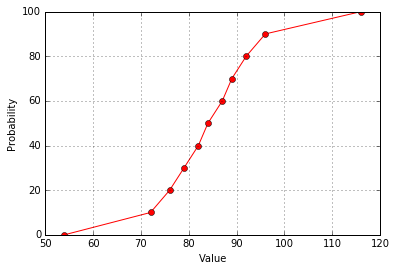

In [152]:
plot_percentiles = range(0, 110, 10) 
x = np.percentile(ll, plot_percentiles)
plt.plot(x, plot_percentiles, 'ro-')
plt.xlabel('Value')
plt.ylabel('Probability')  
plt.grid()
plt.show()

1000


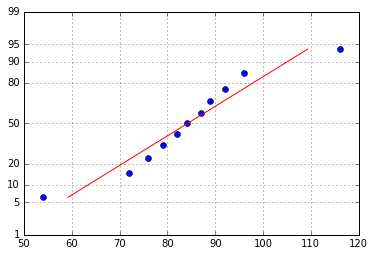

In [154]:
from scipy import stats
import matplotlib.pyplot as plt

nsample=len(ll)
print nsample
#create list of random variables


# Calculate quantiles and least-square-fit curve
(quantiles, values), (slope, intercept, r) = stats.probplot(x, dist='norm')

#plot results
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#define ticks
ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]

#transfrom them from precentile to cumulative density
ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]

#assign new ticks
plt.yticks(ticks_quan,ticks_perc)

#show plot
plt.grid()
plt.show()